In [1]:
#Importing in libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Importing dataset to base dataframe in pandas
df = pd.read_csv('APD_Incident_Extract_2010.csv')

In [3]:
df.head(5)

,Incident Report Number,Crime Type,Date,Time,LOCATION_TYPE,ADDRESS,LONGITUDE,LATITUDE,Location 1
0,20105067300,CRASH/LEAVING THE SCENE,12/18/2010,1100,NaN,11200 BLOCK LAKELINE MALL DR,NaN,NaN,NaN
1,20105067330,CRIMINAL MISCHIEF,12/20/2010,1200,NaN,WEST LYNN ST / W 6TH ST,-97.762642,30.274826,NaN
2,20105067629,COUNTERFEITING,12/21/2010,1650,NaN,2700 BLOCK GONZALES ST,NaN,NaN,NaN
3,20101020316,CRIMINAL MISCHIEF,04/12/2010,559,NaN,6200 BLOCK MANOR RD,NaN,NaN,NaN
4,20105019108,BURGLARY OF VEHICLE,04/15/2010,1200,NaN,4600 BLOCK ELMONT DR,NaN,NaN,NaN


In [4]:
#Standardizing column names into camelCase

In [5]:
df.columns=['incRepNum', 'crimeType', 'date', 'time', 'locationType', 'address', 'longitude', 'latitude', 'location1']

In [6]:
#Honing in on time series features - date and time, datatype checking
df.dtypes

incRepNum         int64
crimeType        object
date             object
time              int64
locationType    float64
address          object
longitude       float64
latitude        float64
location1       float64
dtype: object

In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.dtypes

incRepNum                int64
crimeType               object
date            datetime64[ns]
time                     int64
locationType           float64
address                 object
longitude              float64
latitude               float64
location1              float64
dtype: object

In [9]:
df.head(5)

,incRepNum,crimeType,date,time,locationType,address,longitude,latitude,location1
0,20105067300,CRASH/LEAVING THE SCENE,2010-12-18,1100,NaN,11200 BLOCK LAKELINE MALL DR,NaN,NaN,NaN
1,20105067330,CRIMINAL MISCHIEF,2010-12-20,1200,NaN,WEST LYNN ST / W 6TH ST,-97.762642,30.274826,NaN
2,20105067629,COUNTERFEITING,2010-12-21,1650,NaN,2700 BLOCK GONZALES ST,NaN,NaN,NaN
3,20101020316,CRIMINAL MISCHIEF,2010-04-12,559,NaN,6200 BLOCK MANOR RD,NaN,NaN,NaN
4,20105019108,BURGLARY OF VEHICLE,2010-04-15,1200,NaN,4600 BLOCK ELMONT DR,NaN,NaN,NaN


In [10]:
#Starting with an index of simply date, no time feature 
df = df.set_index('date')

In [11]:
df.head()

,incRepNum,crimeType,time,locationType,address,longitude,latitude,location1
date,,,,,,,,
2010-12-18,20105067300,CRASH/LEAVING THE SCENE,1100,NaN,11200 BLOCK LAKELINE MALL DR,NaN,NaN,NaN
2010-12-20,20105067330,CRIMINAL MISCHIEF,1200,NaN,WEST LYNN ST / W 6TH ST,-97.762642,30.274826,NaN
2010-12-21,20105067629,COUNTERFEITING,1650,NaN,2700 BLOCK GONZALES ST,NaN,NaN,NaN
2010-04-12,20101020316,CRIMINAL MISCHIEF,559,NaN,6200 BLOCK MANOR RD,NaN,NaN,NaN
2010-04-15,20105019108,BURGLARY OF VEHICLE,1200,NaN,4600 BLOCK ELMONT DR,NaN,NaN,NaN


In [12]:
#Converting adding numeric feature of crimeType
#Dropping null first
df = df.dropna(subset=['crimeType'])

In [13]:
df.crimeType = df.crimeType.astype('category')

In [14]:
df['crimeTypenum'] = df['crimeType'].cat.codes

In [15]:
sCrimeType = df.crimeType.value_counts().sort_values(ascending=False)

In [21]:
sCTypeDict = sCrimeType.to_dict() 

In [22]:
df['crimeTypeCounts'] = df['crimeType'].map(sCTypeDict)

In [49]:
df = df.sort_index()
df

,incRepNum,crimeType,time,locationType,address,longitude,latitude,location1,crimeTypenum,crimeTypeCounts
date,,,,,,,,,,
2008-01-01,20105025945,LOST PROP,1200,NaN,13200 BLOCK QUADROS PASS,NaN,NaN,NaN,242,3679
2008-01-01,20105068002,IDENTITY THEFT,1105,NaN,4600 BLOCK SOUTHEAST DR,NaN,NaN,NaN,212,1275
2008-01-01,20105002611,HARASSMENT,1225,NaN,1500 BLOCK FARO DR,NaN,NaN,NaN,200,5257
2008-01-01,20105008532,OUT OF CITY SEXUAL ASSAULT,1,NaN,GARLAND,NaN,NaN,NaN,275,34
2008-01-01,20105021794,IDENTITY THEFT,0,NaN,6000 BLOCK SIGNAL PT,NaN,NaN,NaN,212,1275
2008-01-01,20105001627,LOST PROP,1400,NaN,3300 BLOCK PARKER LN,NaN,NaN,NaN,242,3679
2008-01-01,20105012177,THEFT,835,NaN,4900 BLOCK BURNET RD,NaN,NaN,NaN,347,14192
2008-01-01,20105002054,LOST PROP,1200,NaN,5900 BLOCK JOHNNY MORRIS RD,NaN,NaN,NaN,242,3679
2008-01-01,20105054937,IDENTITY THEFT,0,NaN,1300 BLOCK SOUTHPORT DR,NaN,NaN,NaN,212,1275


In [50]:
#Examining the 2010 dates
start_date = '01-01-2010'
end_date = '12-31-2010'

In [51]:
dateMask = (df.index > start_date) & (df.index <= end_date)

In [52]:
df2010 = df.loc[dateMask]

In [53]:
len(df2010)

158485

In [54]:
len(df)

174128

In [62]:
before_2010_start= '2008-01-01'
before_2010_end = '12-31-2009'

before_2010_mask = (df.index > before_2010_start) & (df.index <= before_2010_end)

dfBefore2010 = df.loc[before_2010_mask]

dfBefore2010.head()

,incRepNum,crimeType,time,locationType,address,longitude,latitude,location1,crimeTypenum,crimeTypeCounts
date,,,,,,,,,,
2008-01-02,20105055173,FRAUD - OTHER,0,NaN,11800 BLOCK BUGGY WHIP TRL,NaN,NaN,NaN,194,790
2008-01-03,20105040698,IDENTITY THEFT,1,NaN,2800 BLOCK PARKER LN,NaN,NaN,NaN,212,1275
2008-01-05,20105059027,LOST PROP,0,NaN,E RIVERSIDE DR / PARKER LN,-97.729313,30.243228,NaN,242,3679
2008-01-05,20102740895,LOST PROP,1900,NaN,E 10TH ST / SAN JACINTO BLVD,-97.738999,30.271112,NaN,242,3679
2008-01-08,20105057487,IDENTITY THEFT,1200,NaN,900 BLOCK OLD KOENIG LN,NaN,NaN,NaN,212,1275


In [63]:
dfBefore2010.tail()

,incRepNum,crimeType,time,locationType,address,longitude,latitude,location1,crimeTypenum,crimeTypeCounts
date,,,,,,,,,,
2009-12-31,20105000003,BURGLARY OF VEHICLE,2000,NaN,900 BLOCK LITTLE TEXAS LN,NaN,NaN,NaN,75,14437
2009-12-31,20105000786,THEFT,1433,NaN,2100 BLOCK E OLTORF ST,NaN,NaN,NaN,347,14192
2009-12-31,20105002382,THEFT OF BICYCLE,1531,NaN,2600 BLOCK CASCADE DR,NaN,NaN,NaN,358,1162
2009-12-31,20105000058,CRIMINAL MISCHIEF,1500,NaN,12200 BLOCK FORSYTHE DR,NaN,NaN,NaN,100,7390
2009-12-31,20105000139,BURGLARY OF VEHICLE,1700,NaN,4000 BLOCK VICTORY DR,NaN,NaN,NaN,75,14437


In [64]:
len(dfBefore2010)

1979

In [85]:
sequentialDf = dfBefore2010.reset_index()

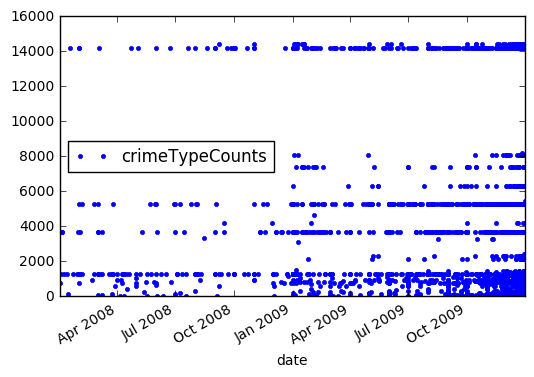

In [86]:
sequentialDf.plot(x='date', y='crimeTypeCounts', style=".")